<center> <h1> 03. MV Frontier <h1> <center>

Let's simulate a MV Frontier using some random weights. Then we compute the mean $\mu$ and the porfolio variance $\sigma^2$. We use the same var-cov matrix and expected return from class

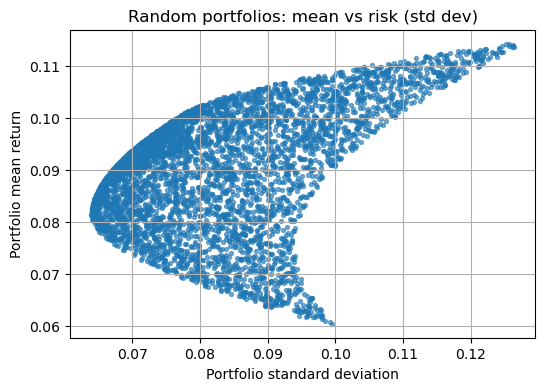

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Covariance matrix (percent -> decimal^2)
Sigma = np.array([[166, 34, 58],
                  [34,  64,  4],
                  [58,   4,100]]) / 10000.0   

# expected returns (percent -> decimal)
mu = np.array([11.5, 9.5, 6.0]) / 100.0

Portfolio_mean = []
Portfolio_var = []

# simulate random (nonnegative) weights that sum to 1
N = 5000
for i in range(N):
    w = np.random.dirichlet(np.ones(3))
    Portfolio_mean.append(w @ mu)          # scalar
    Portfolio_var.append(w @ Sigma @ w)    # scalar (portfolio variance)

# Convert to numpy arrays
Portfolio_mean = np.array(Portfolio_mean)
Portfolio_var = np.array(Portfolio_var)

# Plot
plt.figure(figsize=(6,4))
plt.scatter(np.sqrt(Portfolio_var), Portfolio_mean, s=8, alpha=0.6)
plt.xlabel("Portfolio standard deviation")
plt.ylabel("Portfolio mean return")
plt.title("Random portfolios: mean vs risk (std dev)")
plt.grid(True)
plt.show()


Now we can also compute the theoretical frontier using Markovitz constants:
* $A = \mathbf{1}^\top \Sigma^{-1} \mathbf{1}$
* $B = \mathbf{1}^\top \Sigma^{-1} \mu$
* $C = \mu^\top \Sigma^{-1} \mu$
* $D = AC - B^2$

These are all scalars. Then the variance for a given return $\mu^*$:
$$\sigma^2(\mu^*) = \frac{A \cdot (\mu^*)^2 - 2Br + C}{D}$$


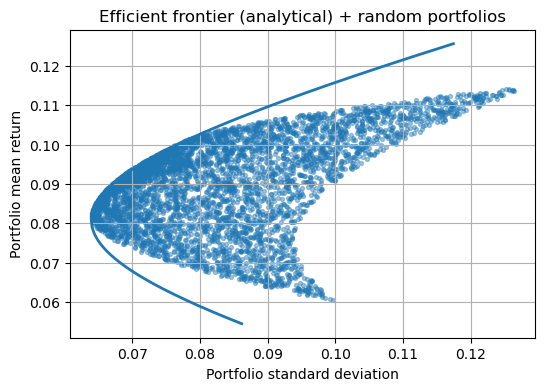

In [2]:
# --- Analytical efficient frontier (minimum variance for each target return) ---
S_inv = np.linalg.inv(Sigma) # inverse
ones = np.ones(3) 

# Define Markovitz constants 
A = ones @ S_inv @ ones
B = ones @ S_inv @ mu
C = mu @ S_inv @ mu
D = A*C - B**2

# choose a sensible range of target returns
r_vals = np.linspace(Portfolio_mean.min()*0.9, Portfolio_mean.max()*1.1, 200)

# minimal variance for target r
var_min_for_r = (A * r_vals**2 - 2*B * r_vals + C) / D   

plt.figure(figsize=(6,4))
plt.scatter(np.sqrt(Portfolio_var), Portfolio_mean, s=8, alpha=0.4)
plt.plot(np.sqrt(var_min_for_r), r_vals, linewidth=2)   # efficient frontier
plt.xlabel("Portfolio standard deviation")
plt.ylabel("Portfolio mean return")
plt.title("Efficient frontier (analytical) + random portfolios")
plt.grid(True)
plt.show()

## 3.1. Tangent Portfolio

Let's add a Risk free asset with return `R_f`. We can compute the Capital Market Line directly using two points that are always on the line:
* The tangency portfolio with weights $w_T$:

$$ w_T = \frac{\Sigma^{-1}\mu^e}{\bold{1}'\Sigma^{-1}\mu^e} $$

* The risk-free asset, i.e. the couple (0,$R_f$)

Hence we just compute the tangent porfolio and the slope of the capital market line (CML). Note that $\mu^e$ is just the excess return of the portfolio (a vector)

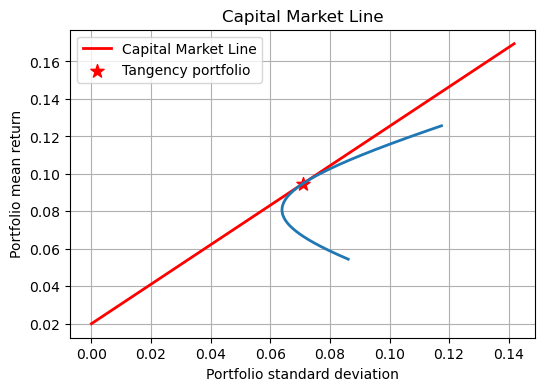

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Risk-free rate
R_f = 0.02

# Tangency portfolio weights
excess_mu = mu - R_f * np.ones(len(mu))
w_tan = np.linalg.inv(Sigma) @ excess_mu
w_tan = w_tan / (np.ones(len(mu)) @ w_tan)  # normalize to sum to 1

# Tangency portfolio mean and std
mu_tan = w_tan @ mu
sigma_tan = np.sqrt(w_tan @ Sigma @ w_tan)

# Capital Market Line
sigma_vals = np.linspace(0, sigma_tan*2, 200)
mu_cml = R_f + (mu_tan - R_f)/sigma_tan * sigma_vals

# Plot
plt.figure(figsize=(6,4))
plt.plot(sigma_vals, mu_cml, 'r-', label="Capital Market Line", linewidth=2)
plt.scatter(sigma_tan, mu_tan, c='red', marker='*', s=100, label="Tangency portfolio")
plt.plot(np.sqrt(var_min_for_r), r_vals, linewidth=2)   
plt.xlabel("Portfolio standard deviation")
plt.ylabel("Portfolio mean return")
plt.title("Capital Market Line")
plt.legend()
plt.grid(True)
plt.show()


Alternatively, one can compute the weights of each portfolio on the line using:

$$ w = \frac{\mu^* - R_f}{(\mu^e)' \Sigma^{-1}\mu^e} \Sigma^{-1}\mu^e $$

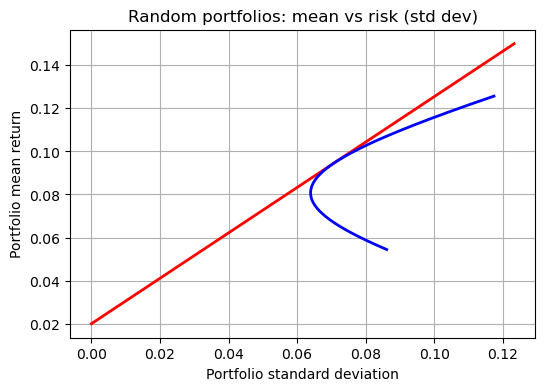

In [4]:
# Define vector of R_f
R_f = 0.02
Vec_R = np.ones(len(mu))*R_f

mu_e = mu - Vec_R

mu_star = np.linspace(R_f, 0.15, 200)
var = np.zeros(len(mu_star))

S_inv = np.linalg.inv(Sigma) 

# Store the variance for each return level
for i in range(len(mu_star)):
    # Efficient frontier weights
    w = (mu_star[i] - R_f)/(mu_e @ S_inv @ mu_e) * S_inv @ mu_e
    
    # Compute variance
    var[i] = w @ Sigma @ w
    

# Plot
plt.figure(figsize=(6,4))
plt.plot(np.sqrt(var), mu_star, c='red',linewidth=2)
plt.plot(np.sqrt(var_min_for_r), r_vals, c='blue',linewidth=2)
plt.xlabel("Portfolio standard deviation")
plt.ylabel("Portfolio mean return")
plt.title("Random portfolios: mean vs risk (std dev)")
plt.grid(True)
plt.show()